# Load data and review

In [62]:
import pandas as pd

def load_csv_from_path(path):
    """
    This is a helper function which opens up a csv file using pandas

    :param path: string indicating the csv file path
    :return a pandas data frame
    """
    return pd.read_csv(path)

data_path = "/Users/medisa/repos/Test/retail_sales_data.csv"
loaded_df = load_csv_from_path(data_path)


In [63]:
def get_df_insights(data_frame):
    """
    A function which would show some basic stats for the given data frame
    
    :param data_frame: a pandas data frame
    :return None
    """
    print("The first five rows of the data frame")
    print(data_frame.head())
    print("\n\n")
    print("Basic information about the Dataframe")
    print(data_frame.info())
    print("\n\n")
    print("Description of the data in the DataFrame")
    print(data_frame.describe())


get_df_insights(loaded_df)


The first five rows of the data frame
  TransactionID CustomerID     Product     Category  Quantity    Price  \
0      TXN00001   CUST0052      Camera  Electronics         1  1489.74   
1      TXN00002   CUST0093     Monitor          NaN         2  1364.68   
2      TXN00003   CUST0015  Smartphone  Accessories         1  1004.30   
3      TXN00004   CUST0072       Mouse          NaN         1    91.89   
4      TXN00005   CUST0061      Laptop  Accessories         3  1719.75   

  TransactionDate Region  
0      2021-12-04  North  
1      12/04/2022   East  
2      27/01/2022   East  
3      22/10/2022  South  
4      17/05/2021    NaN  



Basic information about the Dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    205 non-null    object 
 1   CustomerID       205 non-null    object 
 2   Product          205 

In [68]:
#Check which columns have missing values(to see where the gaps are). This shows for each column, how many missing(NaN) values I have.
loaded_df.isnull().sum()

TransactionID       0
CustomerID          0
Product             0
Category           49
Quantity            0
Price               0
TransactionDate     0
Region             38
dtype: int64

In [ ]:
# def fix_missing_values_in_retail_dataframe(data_frame):
#     """
#     This function is for filling up the Region and Category column in retail dataset
    
#     :param data_frame: retail pandas dataframe
#     :returns updated dataframe
#     """
#     data_frame['Region'] = data_frame['Region'].fillna('Unknown')
#     data_frame['Category'] = data_frame['Category'].fillna('Unknown')
#     return data_frame

def fix_missing_values_in_dataframe(data_frame, column_name):
    """
    This function would get a column name and then replace the missing values in that
    column with Unknown

    :params data_frame: the pandas df which we want to modify
    :params column_name: the name of the column to replace that missing values for
    :returns updated data frame
    """
    data_frame_copy = data_frame.copy()
    data_frame_copy[column_name] = data_frame_copy[column_name].fillna("Unknown")
    return data_frame_copy


fixed_category_df = fix_missing_values_in_dataframe(loaded_df, "Category")
fixed_region_df = fix_missing_values_in_dataframe(fixed_category_df, "Region")


fixed_region_df.isnull().sum()

TransactionID      0
CustomerID         0
Product            0
Category           0
Quantity           0
Price              0
TransactionDate    0
Region             0
dtype: int64

# Cleaning Data

In [4]:
import pandas as pd

data_path = "/Users/medisa/repos/Test/retail_sales_data.csv"
df = pd.read_csv(data_path)

In [5]:
df.head()
#shows the first 5 rows

,TransactionID,CustomerID,Product,Category,Quantity,Price,TransactionDate,Region
0,TXN00001,CUST0052,Camera,Electronics,1,1489.74,2021-12-04,North
1,TXN00002,CUST0093,Monitor,NaN,2,1364.68,12/04/2022,East
2,TXN00003,CUST0015,Smartphone,Accessories,1,1004.30,27/01/2022,East
3,TXN00004,CUST0072,Mouse,NaN,1,91.89,22/10/2022,South
4,TXN00005,CUST0061,Laptop,Accessories,3,1719.75,17/05/2021,NaN


In [6]:
#prints information about the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    205 non-null    object 
 1   CustomerID       205 non-null    object 
 2   Product          205 non-null    object 
 3   Category         156 non-null    object 
 4   Quantity         205 non-null    int64  
 5   Price            205 non-null    float64
 6   TransactionDate  205 non-null    object 
 7   Region           167 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 12.9+ KB


In [7]:
#description of the data in the DataFrame
df.describe()

,Quantity,Price
count,205.000000,205.000000
mean,2.653659,1007.179951
std,1.159804,579.154213
min,1.000000,24.210000
25%,2.000000,504.320000
50%,3.000000,932.760000
75%,4.000000,1554.210000
max,4.000000,1992.780000


# Handle missing values

In [8]:
#Check which columns have missing values(to see where the gaps are). This shows for each column, how many missing(NaN) values I have.
df.isnull().sum()

TransactionID       0
CustomerID          0
Product             0
Category           49
Quantity            0
Price               0
TransactionDate     0
Region             38
dtype: int64

In [9]:
#Fill missing values
df['Region'] = df['Region'].fillna('Unknown')
df['Category'] = df['Category'].fillna('Unknown')

In [10]:
#Double-check missing values
df.isnull().sum()

TransactionID      0
CustomerID         0
Product            0
Category           0
Quantity           0
Price              0
TransactionDate    0
Region             0
dtype: int64

# Fix inconsistent formatting

In [11]:
#Strip extra spaces in text columns

print(df.columns)


Index(['TransactionID', 'CustomerID', 'Product', 'Category', 'Quantity',
       'Price', 'TransactionDate', 'Region'],
      dtype='object')


In [12]:
#Strip spaces
df['TransactionID'] = df['TransactionID'].str.strip()
df['CustomerID'] = df['CustomerID'].str.strip()
df['Product'] = df['Product'].str.strip()
df['Category'] = df['Category'].str.strip()
df['Region'] = df['Region'].str.strip()

In [13]:
#or for all string columns at once:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [14]:
#Standardize letter cases
#first letter uppercase
df['Region'] = df['Region'].str.title()

# took "region" column from dataframe
# turned it into string to make sure it's nothing only string
# applied title method to each row of that column to convert them to title form (first letter capitalized rest small)

#or to apply for all the titles
df = df.apply(lambda col: col.str.strip().str.title() if col.dtype == "object" else col)

# i'm applying a function to the dataframe
# the input is the columns of the dataframe
# this is what I'm doing:
# turn each column to string
# delete extra spaces
# again make sure it's string
# and then turn it to title case (first letter capital rest small)

# do this only if the column is object
# it means if it's string, doesn't need to do these

# otherwise I just return the input value



In [15]:

#Fix mixed data types

#Convert to numeric:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

#Convert to datetime:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')

# Find duplicates

In [16]:
#Prep, snapshot + backup
orig_rows = len(df)
print("Before cleaning:", orig_rows)

Before cleaning: 205


In [17]:
df_raw = df.copy()  #safety copy

In [18]:
#search for business-key, quick check which columns look high-cardinality(good key candidates). Values close to 1.0 (100%) are often unique identifiers.
(df.nunique().sort_values(ascending=False) / len(df)).head(10)

TransactionID      0.975610
Price              0.975610
CustomerID         0.424390
TransactionDate    0.063415
Product            0.039024
Region             0.024390
Category           0.019512
Quantity           0.019512
dtype: float64

In [19]:
#chech the TransactionID uniqueness
df['TransactionID'].is_unique

False

In [20]:
#Count how many duplicates exist
df['TransactionID'].duplicated().sum()

np.int64(5)

# Detect duplicates



1) Exact row duplicates

In [21]:
#Exact row duplicates (all columns identical)
exact_dupe_count = df.duplicated(keep=False).sum()
exact_dupe_count

np.int64(10)

In [22]:
#preview Exact row duplicates for top 10 columns
df[df.duplicated(keep=False)].sort_values(df.columns.tolist()).head(10)

,TransactionID,CustomerID,Product,Category,Quantity,Price,TransactionDate,Region
15,Txn00016,Cust0053,Mouse,Unknown,4,412.34,NaT,East
201,Txn00016,Cust0053,Mouse,Unknown,4,412.34,NaT,East
30,Txn00031,Cust0091,Smartphone,Unknown,1,752.92,NaT,South
202,Txn00031,Cust0091,Smartphone,Unknown,1,752.92,NaT,South
95,Txn00096,Cust0085,Mouse,Gadgets,3,142.13,2021-06-12,North
200,Txn00096,Cust0085,Mouse,Gadgets,3,142.13,2021-06-12,North
128,Txn00129,Cust0012,Smartphone,Unknown,1,1055.89,NaT,North
204,Txn00129,Cust0012,Smartphone,Unknown,1,1055.89,NaT,North
158,Txn00159,Cust0063,Keyboard,Electronics,4,674.10,NaT,West
203,Txn00159,Cust0063,Keyboard,Electronics,4,674.10,NaT,West


2) Key-based duplicates (same ID appearing multiple times)

In [23]:
key_cols = ['TransactionID'] 
key_dupe_count = df.duplicated(subset=key_cols, keep=False).sum()
key_dupe_count

np.int64(10)

In [24]:
#See which keys repeat and how often:
dupe_keys = (df.groupby(key_cols)
               .size()
               .reset_index(name='count')
               .query('count > 1')
               .sort_values('count', ascending=False))
dupe_keys.head(10)

,TransactionID,count
15,Txn00016,2
30,Txn00031,2
95,Txn00096,2
128,Txn00129,2
158,Txn00159,2


In [25]:
#removes all the duplicates, keeps the first
df = df.drop_duplicates()

In [14]:
#to see if it worked:
df.duplicated().sum()           

np.int64(5)

# standardize inconsistent date formats

In [15]:
df["TransactionDate"].head(10)

0    2021-12-04
1    12/04/2022
2    27/01/2022
3    22/10/2022
4    17/05/2021
5    06/10/2021
6    26/12/2022
7    01/09/2021
8    22/07/2021
9    05/01/2022
Name: TransactionDate, dtype: object

In [16]:
#Let’s inspect a few of the raw values before pandas converted them
df_raw = pd.read_csv(data_path, dtype=str)
df_raw["TransactionDate"].head(10)

0    2021-12-04
1    12/04/2022
2    27/01/2022
3    22/10/2022
4    17/05/2021
5    06/10/2021
6    26/12/2022
7    01/09/2021
8    22/07/2021
9    05/01/2022
Name: TransactionDate, dtype: object

In [18]:
df_raw["TransactionDate"].str.contains("-").value_counts()


TransactionDate
False    191
True      14
Name: count, dtype: int64

In [19]:
df_raw["TransactionDate"] = pd.to_datetime(
    df_raw["TransactionDate"], 
    dayfirst=True, 
    errors="coerce"
)


In [20]:
df_raw["TransactionDate"].dtype
#pandas successfully converted your TransactionDate column 
#into true datetime objects

dtype('<M8[ns]')

In [21]:
#temporarily turn the column’s values into strings
#wrap the column with .astype(str) before using .str.contains("/")
mask = df_raw["TransactionDate"].astype(str).str.contains("/")


In [22]:
#Finds all rows with slashes (mask)
#Converts only those using the exact format day/month/year.
#Leaves dash-style dates untouched.
#Keeps everything in one column, fully standardized.
mask = df_raw["TransactionDate"].astype(str).str.contains("/")

df_raw.loc[mask, "TransactionDate"] = pd.to_datetime(
    df_raw.loc[mask, "TransactionDate"],
    format="%d/%m/%Y",
    errors="coerce"
)


In [23]:
df_raw["TransactionDate"].head(10)

0   2021-04-12
1          NaT
2          NaT
3          NaT
4          NaT
5          NaT
6          NaT
7          NaT
8          NaT
9          NaT
Name: TransactionDate, dtype: datetime64[ns]

In [24]:
df_raw.loc[mask & df_raw["TransactionDate"].isna(), "TransactionDate"]


Series([], Name: TransactionDate, dtype: datetime64[ns])

In [25]:
df_raw[df_raw["TransactionDate"].isna()].head(10)


,TransactionID,CustomerID,Product,Category,Quantity,Price,TransactionDate,Region
1,TXN00002,CUST0093,Monitor,NaN,2,1364.68,NaT,East
2,TXN00003,CUST0015,Smartphone,Accessories,1,1004.3,NaT,East
3,TXN00004,CUST0072,Mouse,NaN,1,91.89,NaT,South
4,TXN00005,CUST0061,Laptop,Accessories,3,1719.75,NaT,NaN
5,TXN00006,CUST0021,Monitor,Accessories,2,1108.25,NaT,South
6,TXN00007,CUST0083,Mouse,Gadgets,4,645.56,NaT,East
7,TXN00008,CUST0087,Tablet,NaN,4,572.66,NaT,North
8,TXN00009,CUST0075,Headphones,Accessories,3,1687.33,NaT,NaN
9,TXN00010,CUST0075,Laptop,NaN,3,647.58,NaT,North
10,TXN00011,CUST0088,Monitor,NaN,2,1644.28,NaT,West


In [26]:
df_raw["TransactionDate"].astype("string").str.contains("/", na=False).value_counts()


TransactionDate
False    205
Name: count, dtype: Int64

In [27]:
df_raw["TransactionDate"] = pd.to_datetime(
    df_raw["TransactionDate"],
    format="%d/%m/%Y",
    errors="coerce"
)


In [28]:
df_raw["TransactionDate"].head(10)

0   2021-04-12
1          NaT
2          NaT
3          NaT
4          NaT
5          NaT
6          NaT
7          NaT
8          NaT
9          NaT
Name: TransactionDate, dtype: datetime64[ns]

In [29]:
df_raw = pd.read_csv("retail_sales_data.csv", dtype=str)
df_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TransactionID    205 non-null    object
 1   CustomerID       205 non-null    object
 2   Product          205 non-null    object
 3   Category         156 non-null    object
 4   Quantity         205 non-null    object
 5   Price            205 non-null    object
 6   TransactionDate  205 non-null    object
 7   Region           167 non-null    object
dtypes: object(8)
memory usage: 12.9+ KB


In [209]:
import pandas as pd

# Recreate clean date from raw column
df['TransactionDate'] = pd.to_datetime(
    df['TransactionDate_raw'], 
    errors='coerce', 
    dayfirst=True   # use True if your data is in DD/MM/YYYY format
)

# Drop the raw column (optional)
df = df.drop(columns=['TransactionDate_raw'])

print(df.columns)
df.info()


Index(['TransactionID', 'CustomerID', 'Product', 'Category', 'Quantity',
       'Price', 'Region', 'Sales', 'TransactionDate'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    200 non-null    object        
 1   CustomerID       200 non-null    object        
 2   Product          200 non-null    object        
 3   Category         200 non-null    object        
 4   Quantity         200 non-null    int64         
 5   Price            200 non-null    float64       
 6   Region           200 non-null    object        
 7   Sales            200 non-null    float64       
 8   TransactionDate  4 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 15.6+ KB


In [30]:
# Drop the messy one and rename the clean one
df_raw = df_raw.drop(columns=['TransactionDate'])
df_raw = df_raw.rename(columns={'TransactionDate_clean': 'TransactionDate'})


In [31]:
df.columns.tolist()

['TransactionID',
 'CustomerID',
 'Product',
 'Category',
 'Quantity',
 'Price',
 'TransactionDate',
 'Region']

# Visualization

In [32]:
import matplotlib.pyplot as plt
import numpy as np

In [33]:
#Optionally, if you want prettier styles:
plt.style.use("seaborn-v0_8-whitegrid")


# 1-Sales trend over time

To see how sales change month by month, we’ll:

1-Group by month using TransactionDate

2-Sum up the Sales per month

3-Plot a line chart using matplotlib

In [36]:
monthly_sales = df.groupby("Month")["Sales"].sum()
monthly_sales

KeyError: 'Month'

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


NameError: name 'monthly_sales' is not defined

<Figure size 1000x500 with 0 Axes>

# 2-Category comparison

visualize sales by product category to see which categories earn the most

In [143]:
#visualize sales by product category to see which categories earn the most
category_sales = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)
category_sales


Category
Electronics    145302.73
Accessories    139236.48
Unknown        131365.45
Gadgets        123829.47
Name: Sales, dtype: float64

A bar chart for category sales

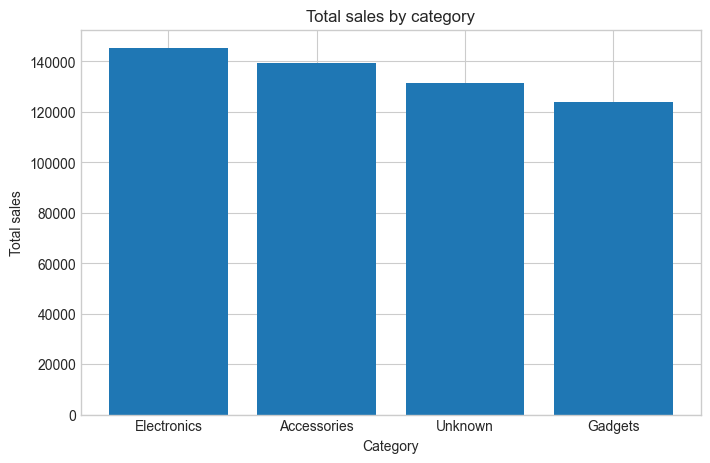

In [144]:
#We’ll use a bar plot, which is perfect for category comparisons
plt.figure(figsize=(8, 5))
plt.bar(category_sales.index, category_sales.values)
plt.title("Total sales by category")
plt.xlabel("Category")
plt.ylabel("Total sales")
plt.show()

# 3-Top customers by total sales

In [145]:
#Next visualization, Top customers by total sales
#This helps you spot your most valuable customers
#Conceptually, it’s the same pattern:
#1-Group by CustomerID
#2-Sum their Sales
#3-Sort descending
#4-Plot a bar chart (often horizontal, for readability)
top_customers = df.groupby("CustomerID")["Sales"].sum().sort_values(ascending=False).head(10)

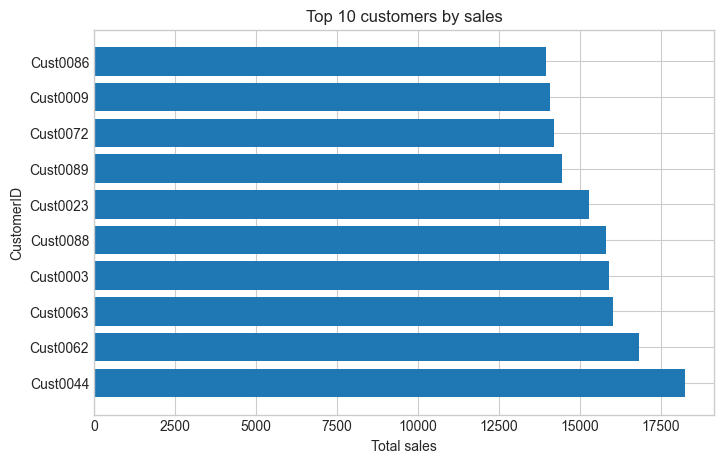

In [88]:
#Let’s visualize them with a horizontal bar chart (better for long names)
plt.figure(figsize=(8, 5))
plt.barh(top_customers.index, top_customers.values)
plt.title("Top 10 customers by sales")
plt.xlabel("Total sales")
plt.ylabel("CustomerID")
plt.show()

In [13]:
df_raw["Sales"] = df_raw["Price"].astype(float) * df_raw["Quantity"].astype(float)
df_raw.columns.tolist()


NameError: name 'df_raw' is not defined

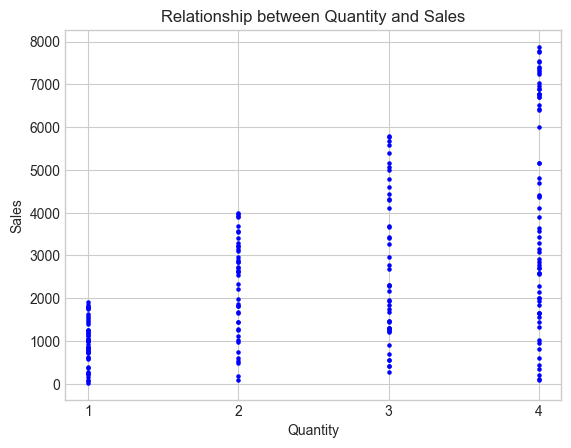

In [147]:
#Scatter plot of Price vs. Quantity to see if there’s any correlation
plt.scatter(df_raw["Quantity"], df_raw["Sales"], c="#00f", marker="o", s=5)
plt.title("Relationship between Quantity and Sales")
plt.xlabel("Quantity")
plt.ylabel("Sales")
plt.show()


# Sales Distribution (Histogram)

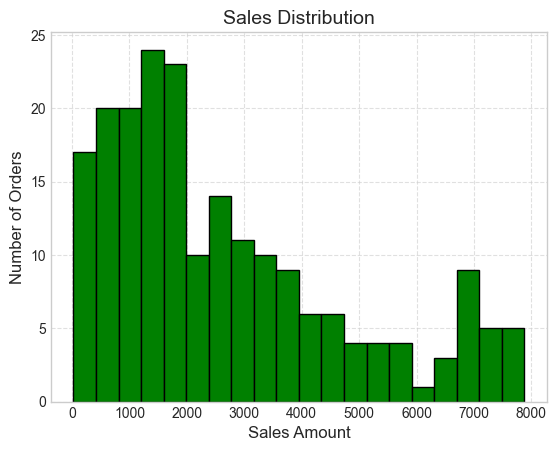

In [148]:
#See how sales amounts are spread
#are most orders small, medium, or large?

# Create a histogram of the 'Sales' column
plt.hist(df_raw['Sales'], bins=20, color='green', edgecolor='black')

# Add a title for clarity
plt.title('Sales Distribution', fontsize=14)

# Label the axes
plt.xlabel('Sales Amount', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

# Optional: Add a grid to make it easier to read
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


In [ ]:
#export cleaned data as Excel
df_raw.to_excel("clean_retail.xlsx", index=False)

In [152]:
#export cleaned data as CSV
df_raw.to_csv('output.csv', index=False)
print("CSV file exported successfully!")

CSV file exported successfully!


In [ ]:
#missed TransactionDate and sales columns. now to restore them from backup:
import pandas as pd

# Load backup file
df_backup = pd.read_csv("retails_sales_data_clean.csv")

# Check what columns are available
print(df_backup.columns.tolist())


['TransactionID', 'CustomerID', 'Product', 'Category', 'Quantity', 'Price', 'TransactionDate', 'Region', 'TransactionDate_clean', 'Sales']


In [53]:
# Restore the clean date column into the current df
df['TransactionDate'] = pd.to_datetime(df_backup['TransactionDate_clean'], errors='coerce')

# Optionally drop the old raw date if it still exists
df = df.drop(columns=['TransactionDate_raw'], errors='ignore')

# Check if everything looks good
print(df.columns)
df.info()


Index(['TransactionID', 'CustomerID', 'Product', 'Category', 'Quantity',
       'Price', 'Region', 'TransactionDate', 'Sales'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    205 non-null    object        
 1   CustomerID       205 non-null    object        
 2   Product          205 non-null    object        
 3   Category         156 non-null    object        
 4   Quantity         205 non-null    int64         
 5   Price            205 non-null    float64       
 6   Region           167 non-null    object        
 7   TransactionDate  205 non-null    datetime64[ns]
 8   Sales            205 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 14.5+ KB


In [59]:
import pandas as pd

# Load the clean file
df = pd.read_csv("retails_sales_data_clean.csv", parse_dates=['TransactionDate'])

# Add the Sales column if it doesn’t exist
if 'Sales' not in df.columns:
    df['Sales'] = df['Quantity'] * df['Price']

# Confirm everything looks correct
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TransactionID          205 non-null    object 
 1   CustomerID             205 non-null    object 
 2   Product                205 non-null    object 
 3   Category               156 non-null    object 
 4   Quantity               205 non-null    int64  
 5   Price                  205 non-null    float64
 6   TransactionDate        205 non-null    object 
 7   Region                 167 non-null    object 
 8   TransactionDate_clean  205 non-null    object 
 9   Sales                  205 non-null    float64
dtypes: float64(2), int64(1), object(7)
memory usage: 16.1+ KB
None
  TransactionID CustomerID     Product     Category  Quantity    Price  \
0      TXN00001   CUST0052      Camera  Electronics         1  1489.74   
1      TXN00002   CUST0093     Monitor          NaN    

In [60]:
#double check columns
df.columns.tolist()

['TransactionID',
 'CustomerID',
 'Product',
 'Category',
 'Quantity',
 'Price',
 'TransactionDate',
 'Region',
 'TransactionDate_clean',
 'Sales']

In [61]:
# if df['TransactionDate_clean'] is the cleaned one, replace it with TransactionDate
df = df.drop(columns=['TransactionDate'])
df = df.rename(columns={'TransactionDate_clean': 'TransactionDate'})


In [62]:
df.columns.tolist()

['TransactionID',
 'CustomerID',
 'Product',
 'Category',
 'Quantity',
 'Price',
 'Region',
 'TransactionDate',
 'Sales']

In [65]:
#to verify if it's the cleaned one
df["TransactionDate"]

0      2021-12-04
1      2022-04-12
2      2022-01-27
3      2022-10-22
4      2021-05-17
          ...    
200    2021-06-12
201    2021-10-30
202    2021-04-26
203    2021-05-19
204    2022-12-30
Name: TransactionDate, Length: 205, dtype: object

In [66]:
df.to_csv("retail_sales_clean2.csv", index=False)
print("CSV file exported successfully!")

CSV file exported successfully!


In [44]:
import pandas as pd

# Load your backup file
df_backup = pd.read_csv("retails_sales_data_clean.csv")

# Check what columns are available
print(df_backup.columns.tolist())


['TransactionID', 'CustomerID', 'Product', 'Category', 'Quantity', 'Price', 'TransactionDate', 'Region', 'TransactionDate_clean', 'Sales']


# Sales in different months of the year

In [45]:
#see the sales in different months to check in which months the sale is higher
#we need to make sure:
#1-the TransactionDate column is a real date type.
#2-Extracting the month from it.
#3-Grouping by that month and summing the sales.
df["TransactionDate"].head()

0    2021-12-04
1    12/04/2022
2    27/01/2022
3    22/10/2022
4    17/05/2021
Name: TransactionDate, dtype: object

In [78]:
df["TransactionDate"].dtype
#this means the TransactionDate is still object/string type, we need to convert it to datetime type

dtype('<M8[ns]')

In [114]:
#turn the TransactionDate to datetime type
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"], errors="coerce")


In [115]:
df["TransactionDate"].dtype

dtype('<M8[ns]')

In [41]:
#now extract the month from TransactionDate so we can group sales by month:
df["Month"] = df["TransactionDate"].dt.month

AttributeError: Can only use .dt accessor with datetimelike values

In [117]:
df[["TransactionDate", "Month"]].head(10)

,TransactionDate,Month
0,2021-12-04,12
1,2022-04-12,4
2,2022-01-27,1
3,2022-10-22,10
4,2021-05-17,5
5,2021-10-06,10
6,2022-12-26,12
7,2021-09-01,9
8,2021-07-22,7
9,2022-01-05,1


In [3]:
monthly_sales = df.groupby("Month")["Sales"].sum()
monthly_sales

NameError: name 'df' is not defined

Visualization:

In [1]:
import matplotlib.pyplot as plt


In [2]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


NameError: name 'monthly_sales' is not defined

<Figure size 1000x500 with 0 Axes>

In [ ]:
df

def clean_data(data_frame):
    X
    Y
    Z
    return result


df_cleaned = clean_data(df)


def fix_date_time(data_frame):
    X
    Y
    Z
    return result

corrected_time_df = fix_date_time(df_cleaned)


df = x
df = y
df = z

df